In [3]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [4]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [7]:
import pandas as pd

In [9]:
import numpy as np

import statsmodels.api as sm

In [66]:
import matplotlib.pyplot as plt

In [67]:
np.random.seed(123)

In [68]:
import seaborn as sns

In [69]:
import os

In [70]:
dataset=pd.read_csv('car data.csv')

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [16]:
len(dataset)

301

In [71]:
dataset.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [72]:
len(dataset.columns)

9

# Exploratory Data Analysis (EDA)

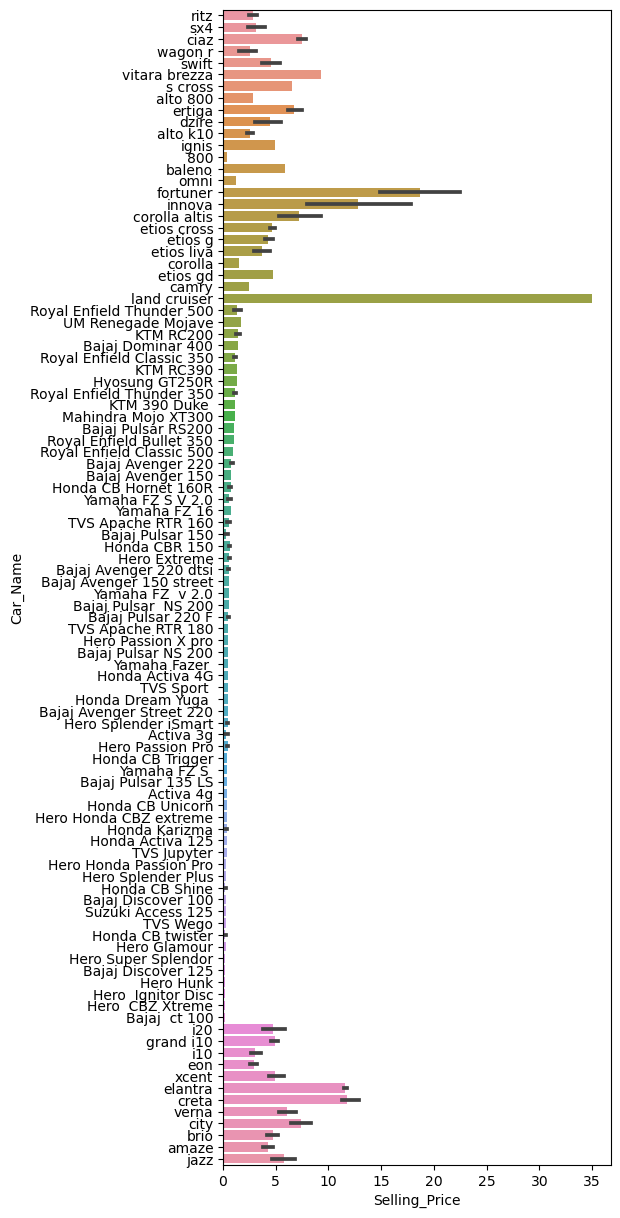

In [19]:
plt.figure(figsize=(5,15))
sns.barplot(data=dataset, y='Car_Name',x='Selling_Price')
plt.show()


land cruise has higher selling price

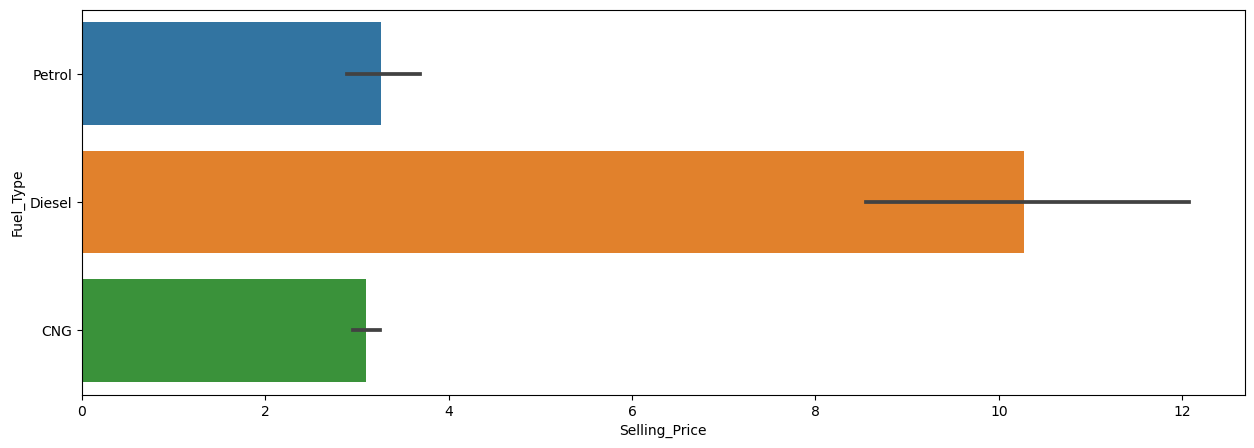

In [20]:
plt.figure(figsize=(15,5))
sns.barplot(data=dataset, y='Fuel_Type',x='Selling_Price')
plt.show()


diesel cars has higher selling price

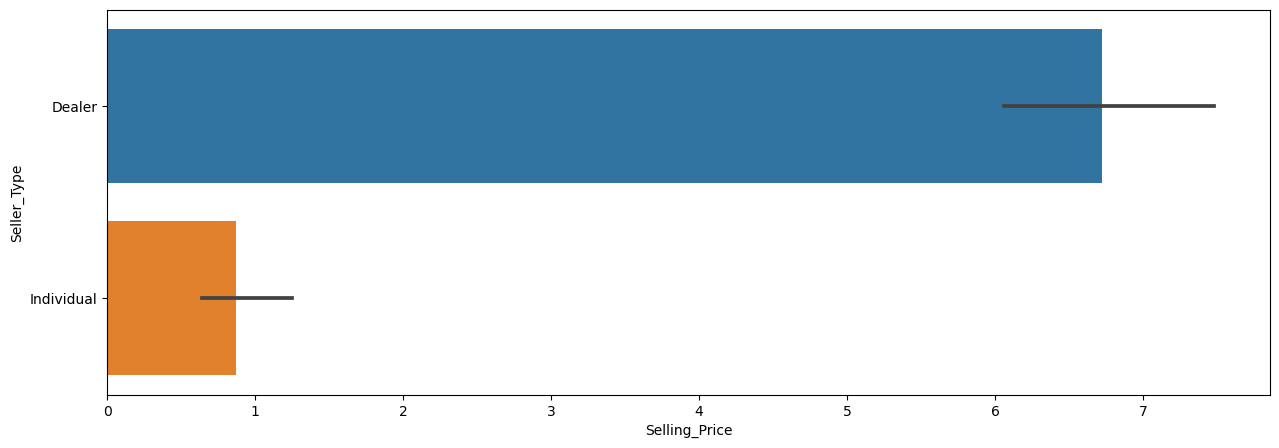

In [21]:
plt.figure(figsize=(15,5))
sns.barplot(data=dataset, y='Seller_Type',x='Selling_Price')
plt.show()


dealers having higher selling price

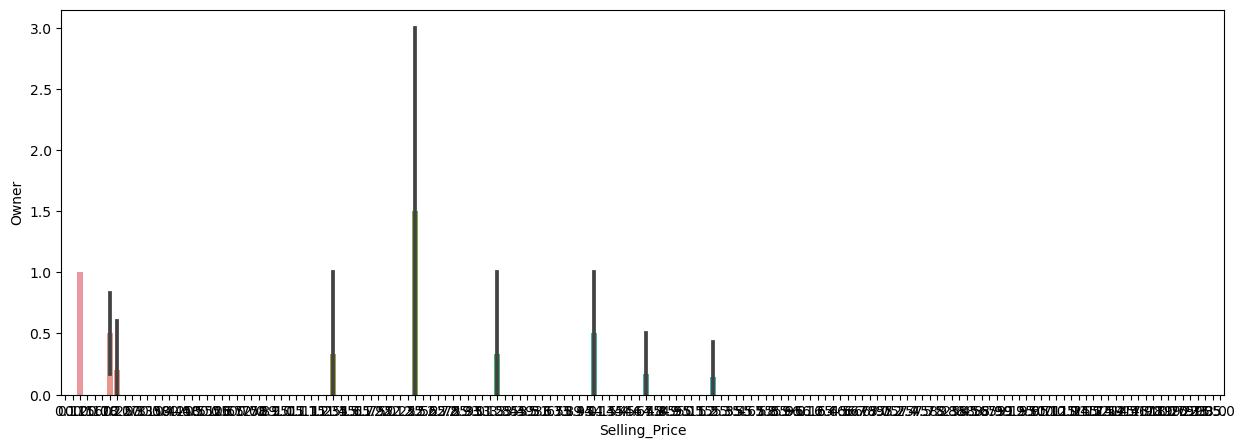

In [22]:
plt.figure(figsize=(15,5))
sns.barplot(data=dataset, y='Owner',x='Selling_Price')
plt.show()

test drive car has higher selling price

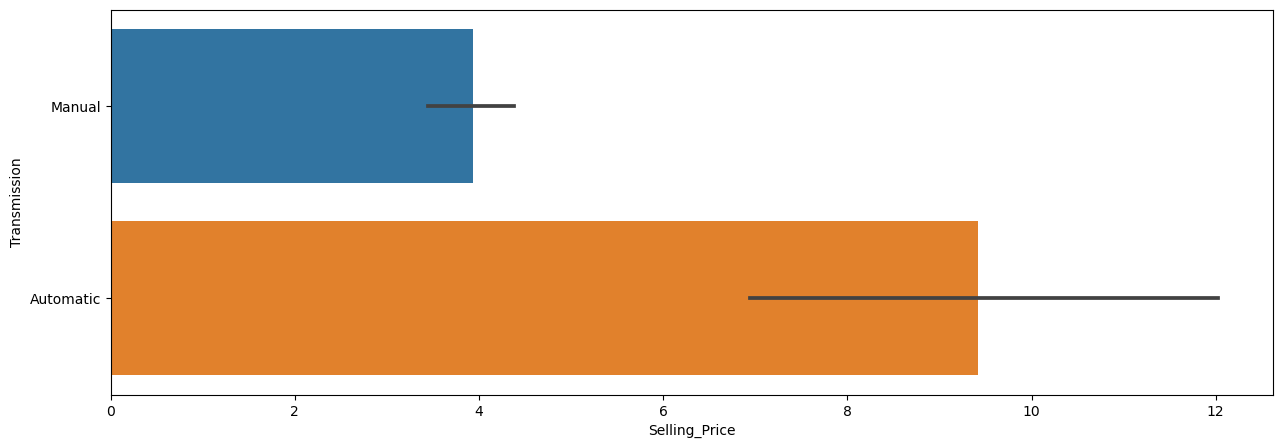

In [23]:
plt.figure(figsize=(15,5))
sns.barplot(data=dataset, y='Transmission',x='Selling_Price')
plt.show()

automatic cars has higher selling price

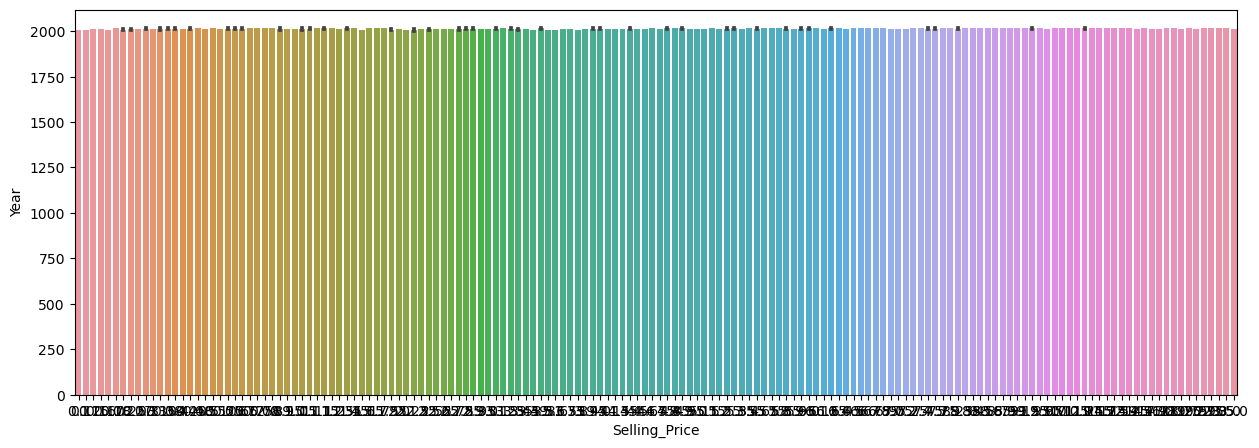

In [24]:
plt.figure(figsize=(15,5))
sns.barplot(data=dataset, y='Year',x='Selling_Price')
plt.show()

newer car has higher selling price

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x500 with 0 Axes>

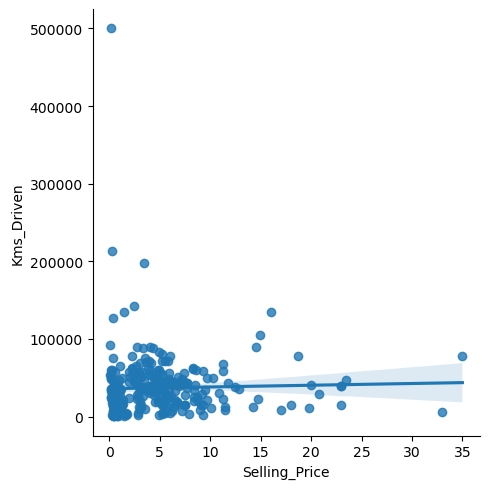

In [25]:
plt.figure(figsize=(15,5))
sns.lmplot(data=dataset, y='Kms_Driven',x='Selling_Price')
plt.show()

lesser km driven the more is price

In [26]:
def outlier_treatment(dataframe):
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3-Q1
    df_rem_out = dataframe[~((dataframe < (Q1 - 1.5*IQR))| (dataframe > (Q3 + 1.5*IQR))).any(axis=1)]
    return df_rem_out



In [27]:
plt.show()

In [28]:
len(dataset)

301

# missing value treatment

In [29]:
dataset.isnull().sum()/len(dataset)*100

Car_Name         0.0
Year             0.0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
dtype: float64

no missing values

# encoding

In [30]:
from sklearn.preprocessing import StandardScaler
def data_type(dataset):
    """
    function to identify numerical or categorical data columns
    :param data: Dataframe
    :return: list of numerical or categorical columns
    """
    numerical = []
    categorical = []
    for i in dataset.columns:
        if dataset[i].dtype == 'int64' or dataset[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical

numerical, categorical = data_type(dataset) 

In [31]:
def binary_columns(df):
    """
    Generates a list of binary columns in dataframe.
    """
    binary_cols = []
    for col in df.select_dtypes(include=['int', 'float']).columns:
        unique_values = df[col].unique()
        if np.in1d(unique_values,[0, 1]).all:
            binary_cols.append(col)
    return binary_cols

binary_cols = binary_columns(dataset)
numerical = [i for i in numerical if i not in binary_cols]

In [32]:
def encoding(dataset, categorical):
    """
    Function to automate the process of encoding the categorical data
    :param dataset: Dataframe
    :param categorical: List of categorical columns
    :return: Dataframe
    """
    for i in categorical:
        dataset[i] = dataset[i].astype('category')
        dataset[i] = dataset[i].cat.codes
    return dataset

dataset = encoding(dataset, categorical)


In [33]:
dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,69,2016,9.50,11.60,33988,1,0,1,0
297,66,2015,4.00,5.90,60000,2,0,1,0
298,69,2009,3.35,11.00,87934,2,0,1,0
299,69,2017,11.50,12.50,9000,1,0,1,0


# spliting data into train test

In [34]:
x= dataset.iloc[:,[0,2,4,5,6,7,8]].values

In [35]:
y=dataset.iloc[:,3].values

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

# linear regression

In [37]:
from sklearn.linear_model import LinearRegression, Ridge

In [38]:
regressor_ini = LinearRegression()
regressor_ini.fit(x_train, y_train)

regressor_ini_R2 = regressor_ini.score(x_train, y_train)
print('R^2: {0}'.format(regressor_ini_R2))



R^2: 0.8676954053880238


In [39]:
dataset = pd.Dataframe({
     'Car_Name':carname,       
      'Year':year,            
       'Present_Price': present price,  
      'Kms_Driven': drive km,     
       'Fuel_Type': fueltype,     
       'Seller_Type': sellertype,
        'Transmission': typeof transmission,
         'Owner':owner  
})

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2122183157.py, line 4)

In [40]:
def calculate_residuals(model, features, label):
    predictions = model.predict(features)
    df_results = pd.dataframe({'Actual': label, 'Predicted':predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results
    

In [41]:
def linear_assumptions(model, features, label):
    df_results = calculate_residuals(model, features, label)
    sns.lmplot(x='Actual' , y='Predicted', data=df_results,fit_reg=False)
    
    
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords, #x and y points
            color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()
    
    
    
    
    

In [42]:
linear_assumptions(regressor_ini, x_train, y_train)

AttributeError: module 'pandas' has no attribute 'dataframe'

In [43]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

y_linear_pred_train = linear_model.predict(x_train)
y_linear_pred = linear_model.predict(x_test)                                            

create ridge regression model

In [56]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)

y_ridge_pred_train = ridge_model.predict(x_train)
y_ridge_pred = ridge_model.predict(x_test) 

mse_ridge_train = mean_squared_error(y_train, y_ridge_pred_train)
mse_ridge = mean_squared_error(y_test, y_ridge_pred)
 



In [45]:
from sklearn.linear_model import LinearRegression, Lasso

calculating MSE models for both

In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
mse_linear_train = mean_squared_error(y_train, y_linear_pred_train)
mse_linear = mean_squared_error(y_test, y_linear_pred)
 

create lasso regression model

In [50]:
lasso_model = Lasso(alpha=1.0)

lasso_model.fit(x_train, y_train)

y_pred_lasso_train = lasso_model.predict(x_train)
y_pred_lasso = lasso_model.predict(x_test) 

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_lasso_train = mean_squared_error(y_train, y_pred_lasso_train)


In [51]:
print(f'linear regression MSE - train: {mse_linear_train:.2f}')

linear regression MSE - train: 11.93


In [52]:
print(f'linear regression MSE - test: {mse_linear:.2f}')

linear regression MSE - test: 35.69


In [54]:
coefficient = lasso_model.coef_

print(f'lasso regression coefficient: {coefficient}')
print(f'lasso regression Intercept: {lasso_model.intercept_}')

lasso regression coefficient: [-7.56099691e-03  1.49277531e+00  9.02933994e-05  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00]
lasso regression Intercept: -1.9152245721396097


In [57]:
print(f'linear Ridge Regression MSE - train: {mse_ridge_train:.2f}')

linear Ridge Regression MSE - train: 11.93


In [58]:
print(f'Ridge regression MSE - test: {mse_linear:.2f}')

Ridge regression MSE - test: 35.69


In [59]:
print("deviation of test from train error in linear regression", abs(mse_linear-mse_linear_train))

deviation of test from train error in linear regression 23.758810072496566


In [61]:
print("deviation of test from train error in ridge regression", abs(mse_ridge-mse_ridge_train))

deviation of test from train error in ridge regression 23.520986947779612
